# Linear regression biomass and persistent green

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sc
import math
import numpy as np
from scipy import mean
from scipy.stats import zscore
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import pandas as pd

%matplotlib inline  

In [70]:
df_all_path = r"D:\z_drive_bu\tern\tree_biomass_field_data\outputs\subset_all_df.csv"
df_no0_path = r"D:\z_drive_bu\tern\tree_biomass_field_data\outputs\subset_no0_df.csv"
df_some0_path = r"D:\z_drive_bu\tern\tree_biomass_field_data\outputs\subset_some0_df.csv"

In [71]:
df_path = df_some0_path

In [72]:
df = pd.read_csv(df_path, index_col=0)

In [73]:
df

,pg_mean,pg_min,pg_max,pg_med,total_agb
0,21.750000,17.0,25.0,22.0,7658.5425
1,8.437500,2.0,23.0,7.5,3123.1200
2,33.157895,24.0,45.0,30.0,17994.7600
3,53.954545,44.0,64.0,54.5,35199.7100
4,30.347826,18.0,41.0,31.0,4370.9120
5,43.080000,37.0,50.0,43.0,25701.6900
6,45.350000,42.0,50.0,45.5,26636.2950
7,34.400000,21.0,41.0,34.0,11338.1275
8,38.562500,34.0,42.0,39.0,9757.3350
9,69.062500,66.0,76.0,69.0,18757.2000


In [74]:
value_x = 'pg_mean'
value_y = 'total_agb'

https://medium.com/analytics-vidhya/linear-regression-in-python-from-scratch-with-scipy-statsmodels-sklearn-da8e373cc89b

C:\Users\rmcgr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rmcgr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


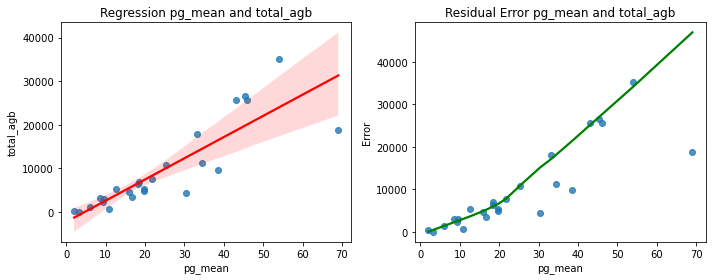

In [75]:
plt.figure(figsize=(10,4))
# left plot
plt.subplot(1,2,1)
sns.regplot(df[value_x], df[value_y], line_kws={"color":"red"})
plt.xlabel(value_x)
plt.ylabel(value_y)
plt.title("Regression {0} and {1}".format(value_x, value_y))

# right plot
plt.subplot(1,2,2)
sns.regplot(df[value_x], df[value_y], lowess=True, line_kws={"color":"green"})
plt.xlabel(value_x)
plt.ylabel("Error")
plt.title("Residual Error {0} and {1}".format(value_x, value_y))
plt.tight_layout()

In [76]:
x = df[value_x]
y = df[value_y]

In [77]:
df_reg = pd.DataFrame()
df_reg['x']=x
df_reg['y']=y
df_reg['xy'] = df_reg.x * df_reg.y
df_reg['x2'] = df_reg.x**2
df_reg['y2'] = df_reg.y**2
df_reg['x-xavg**2'] = (df_reg.x - df_reg.x.mean())**2
df_reg['y-yavg**2'] = (df_reg.y - df_reg.y.mean())**2

In [78]:
df_reg

,x,y,xy,x2,y2,x-xavg**2,y-yavg**2
0,21.750000,7658.5425,1.665733e+05,473.062500,5.865327e+07,7.451562,4.019856e+06
1,8.437500,3123.1200,2.635133e+04,71.191406,9.753879e+06,257.353946,4.277657e+07
2,33.157895,17994.7600,5.966684e+05,1099.445983,3.238114e+08,75.310109,6.940989e+07
3,53.954545,35199.7100,1.899184e+06,2911.092975,1.239020e+09,868.763272,6.520980e+08
4,30.347826,4370.9120,1.326477e+05,920.990548,1.910487e+07,34.434258,2.801149e+07
5,43.080000,25701.6900,1.107229e+06,1855.886400,6.605769e+08,345.969114,2.572235e+08
6,45.350000,26636.2950,1.207956e+06,2056.622500,7.094922e+08,435.567126,2.880758e+08
7,34.400000,11338.1275,3.900316e+05,1183.360000,1.285531e+08,98.411261,2.804376e+06
8,38.562500,9757.3350,3.762672e+05,1487.066406,9.520559e+07,198.323707,8.804955e+03
9,69.062500,18757.2000,1.295419e+06,4769.628906,3.518326e+08,1987.621151,8.269537e+07


In [79]:
def lin_regr_func(x,y):
    n = len(x)
    # denominator
    d = (n*(x**2).sum()-x.sum()**2)
    # intercept
    a = (y.sum()*(x**2).sum()-x.sum()*(x*y).sum())/d
    # slope
    b = (n*(x*y).sum()-x.sum()*y.sum())/d
    
    y_pred = x*b+a
    yyi = (y-y_pred)**2
    xxi = (x.mean()-x)**2
    #standard error
    sb = np.sqrt(yyi.sum()/(n-2))/np.sqrt(xxi.sum())
    
    # correlation coefficient
    corr_coeff = (n*(x*y).sum() - x.sum()*y.sum())/(np.sqrt(n*(x**2).sum()-x.sum()**2)*np.sqrt((n*(y**2).sum()-y.sum()**2)))
    return a,b,corr_coeff,sb

In [80]:
a,b,corr_coeff,sb = lin_regr_func(x,y)

In [81]:
print("intercept: ", a)
print("slope: ", b)
print("r: ", corr_coeff**2)
print("standard error of the slope: ", sb)

intercept:  -2224.119526762853
slope:  485.610244174035
r:  0.7431923054198605
standard error of the slope:  59.52197533601324


In [82]:
df_reg["y_predict"] = df_reg["x"]*b+a
df_reg["error"] = df_reg["y"]-df_reg["y_predict"]
df_reg.sample(10)

,x,y,xy,x2,y2,x-xavg**2,y-yavg**2,y_predict,error
5,43.080000,25701.6900,1.107229e+06,1855.886400,6.605769e+08,345.969114,2.572235e+08,18695.969792,7005.720208
19,18.454545,6946.7825,1.281997e+05,340.570248,4.825779e+07,36.303150,7.380555e+06,6737.596798,209.185702
25,3.187500,0.0000,0.000000e+00,10.160156,0.000000e+00,453.360123,9.338324e+07,-676.236873,676.236873
15,19.750000,5359.2000,1.058442e+05,390.062500,2.872102e+07,22.370582,1.852700e+07,7366.682796,-2007.482796
7,34.400000,11338.1275,3.900316e+05,1183.360000,1.285531e+08,98.411261,2.804376e+06,14480.872873,-3142.745373
27,5.950000,1275.1200,7.586964e+03,35.402500,1.625931e+06,343.351821,7.036492e+07,665.261426,609.858574
30,9.360000,2254.5600,2.110268e+04,87.609600,5.083041e+06,228.606992,5.489240e+07,2321.192359,-66.632359
11,16.684211,3511.2000,5.858160e+04,278.362881,1.232853e+07,60.770514,3.785080e+07,5877.904021,-2366.704021
3,53.954545,35199.7100,1.899184e+06,2911.092975,1.239020e+09,868.763272,6.520980e+08,23976.760466,11222.949534
10,46.000000,25585.0700,1.176913e+06,2116.000000,6.545958e+08,463.120945,2.534964e+08,20113.951705,5471.118295


## Scipy

In [83]:
slope, intercept, r_value, p_value, std_err = sc.linregress(x,y)

print("slope: ", slope, "intercept: ", intercept, "r2: ",  r_value**2, "p value: ",  p_value, "std_err: ", std_err)

slope:  485.61024417403496 intercept:  -2224.11952676285 r2:  0.7431923054198606 p value:  3.058263379892626e-08 std_err:  59.52197533601325


In [84]:
X = sm.add_constant(x)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:              total_agb   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     66.56
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           3.06e-08
Time:                        06:37:55   Log-Likelihood:                -247.44
No. Observations:                  25   AIC:                             498.9
Df Residuals:                      23   BIC:                             501.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2224.1195   1769.055     -1.257      0.2

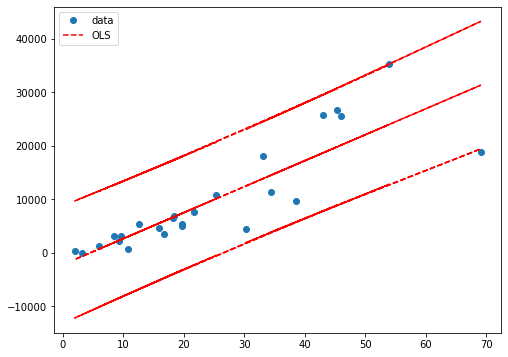

In [85]:
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label='data')
#ax.plot(x,df.y_predict, 'b-', label="true")
ax.plot(x, res.fittedvalues, 'r--', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best')

#### Mean squared error and the root mean squared error

In [86]:
mse_c = (df_reg['error']**2).sum()/len(df_reg.error)
mse_c, np.sqrt(mse_c)

(23148660.017639037, 4811.305437990716)

In [87]:
from statsmodels.tools.eval_measures import mse, rmse

In [61]:
mse(df_reg['y'], df_reg['y_predict']), rmse(df_reg['y'], df_reg['y_predict'])

(20935528.19760321, 4575.535837211114)

In [88]:
value_ = value_y

# May need to read tihis again

C:\Users\rmcgr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


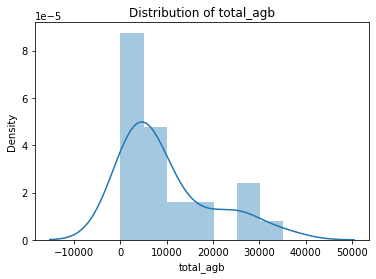

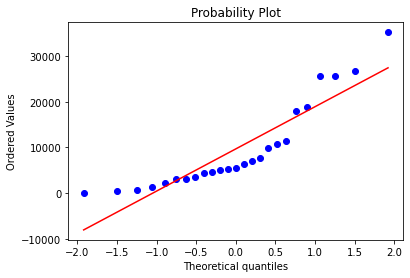

In [89]:
sns.distplot(df[value_]).set_title("Distribution of {0}".format(value_))

# probability plot
fig = plt.figure()
res = sc.probplot(df[value_], plot=plt)

Right squewdness identified, can be correctedwit a log transform

C:\Users\rmcgr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mean = 8.35 and std dev = 2.04



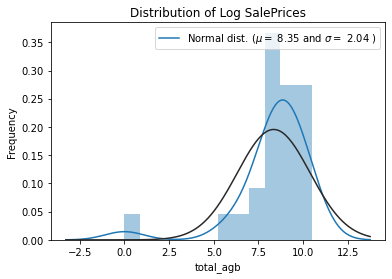

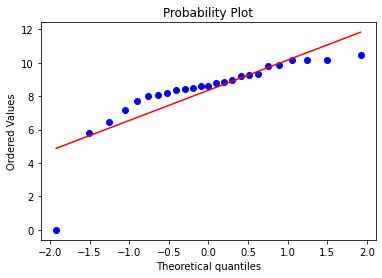

In [90]:
#Using the log1p function applies log(1+x) to all elements of the column
df[value_] = np.log1p(df[value_])

#Check the new distribution after log transformation 
sns.distplot(df[value_], fit=sc.norm)

# Get the fitted parameters used by the function
(mu, sigma) = sc.norm.fit(df[value_])
print( '\n mean = {:.2f} and std dev = {:.2f}\n'.format(mu, sigma))

#NPlotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Log SalePrices')

#Also the QQ plot
fig = plt.figure()
res = sc.probplot(df[value_], plot=plt)
plt.show()